# Pandas

[Pandas](http://pandas.pydata.org/) - стандарт в области анализа данных на Python.

![](http://pandas.pydata.org/_static/pandas_logo.png)

Основные функции библиотеки pandas:
+ быстрый и эффективный процесс чтения/записи файлов различных форматов (csv -> SQL);
+ быстрое и эффективное манипулирование данными (добавление, репликация и т.д);
+ эффективная работа с грязными данными, с пропусками в данных;
+ удобная работа со срезами, индексами, изменением формы, подвыборками;
+ широкий функционал группировки и сводных таблиц;
+ отличная работа с временны'ми рядами;
+ высокая производительность (основной код на C и Cython);
+ бесплатное программное обеспечение.

## Learning by doing

Давайте скачаем данные проекта [MOPEX](http://www.nws.noaa.gov/ohd/mopex/mo_datasets.htm) и посмотрим, что можно с ними сделать.

Репозиторий данных проекта MOPEX - ftp://hydrology.nws.noaa.gov/pub/gcip/mopex/US_Data/:
+ /Basin_Characteristics/usgs431.txt - список водосборов;
+ /Us_438_Daily/ - директория с основными данными (осадки, испарение, температура);

In [1]:
# Загрузим файл со списком водосборов
# Прим.: именно этой командой мы можем загрузить весь интеренет (вряд ли стоит это делать)

#!wget ftp://hydrology.nws.noaa.gov/pub/gcip/mopex/US_Data/Basin_Characteristics/usgs431.txt

In [2]:
# Проверяем загрузку, имя файла
!ls

02156500.dly	 usgs431.txt	    Week3_practice.pdf
03_pandas.ipynb  Week3_lecture.pdf


In [3]:
# импортируем pandas и numpy
import pandas as pd
import numpy as np

In [4]:
pd.read_table('usgs431.txt')

,"02156500 -81.4222 34.5961 2790.00 10/1938 09/1995 57 100 SC 3050106 BROAD RIVER NEAR CARLISLE, S. C."
0,01567000 -77.1294 40.4783 3354.00 ...
1,01610000 -78.4567 39.5389 3109.00 ...
2,01531000 -76.6350 42.0022 2506.00 ...
3,06810000 -95.6256 40.6325 2806.00 2806...
4,03253500 -84.3108 38.7103 3300.00 ...
5,10301500 -119.0972 39.1528 2600.00 ...
6,02116500 -80.3861 35.8567 2280.00 ...
7,06908000 -93.1967 38.9922 1120.00 ...
8,03274000 -84.5722 39.3911 3630.00 ...
9,03455000 -83.1611 35.9817 1858.00 1858...


In [5]:
# Открываем файл, считываем только нужные нам столбцы (идентификатор, координаты, площадь)

f = open("usgs431.txt", 'r')

basin_id = []
basin_long = []
basin_lat = []
basin_area = []
for line in f:
    s = line.split()
    basin_id.append(s[0])
    basin_long.append(s[1])
    basin_lat.append(s[2])
    basin_area.append(s[3])

# Создаем рабочий DataFrame
basin_list = pd.DataFrame({'ID': basin_id, 
                           'long': basin_long, 
                           'lat': basin_lat, 
                           'area': basin_area})

In [6]:
# Посмотрим, что получилось
basin_list.head()

,ID,area,lat,long
0,02156500,2790.00,34.5961,-81.4222
1,01567000,3354.00,40.4783,-77.1294
2,01610000,3109.00,39.5389,-78.4567
3,01531000,2506.00,42.0022,-76.6350
4,06810000,2806.00,40.6325,-95.6256


In [7]:
# Проверим типы данных
basin_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 4 columns):
ID      431 non-null object
area    431 non-null object
lat     431 non-null object
long    431 non-null object
dtypes: object(4)
memory usage: 13.5+ KB


In [8]:
# Для нормальной работы нам нужно, чтобы координаты и площади были вещественными
basin_list['long'] = pd.to_numeric(basin_list['long'], errors='coerce')
basin_list['lat'] = pd.to_numeric(basin_list['lat'], errors='coerce')
basin_list['area'] = pd.to_numeric(basin_list['area'], errors='coerce')

In [9]:
# Проверим типы данных
basin_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 4 columns):
ID      431 non-null object
area    430 non-null float64
lat     431 non-null float64
long    431 non-null float64
dtypes: float64(3), object(1)
memory usage: 13.5+ KB


In [10]:
# Одно значение площади не заполнено!
# Посмотрим, какое
basin_list[basin_list['area'].isnull() == True]

,ID,area,lat,long
133,02273000,NaN,27.2256,-80.9628


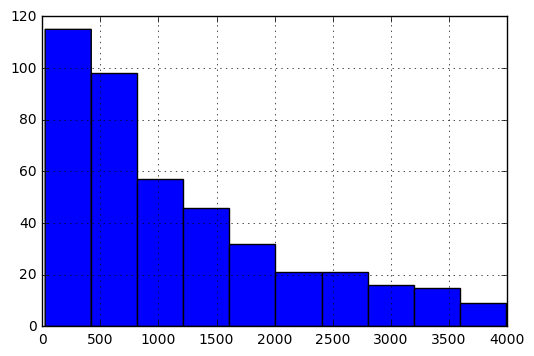

In [11]:
# Хотим рисунки внутри notebook
%matplotlib inline

# Распределение наших водосборов по площадям
basin_list["area"].hist()

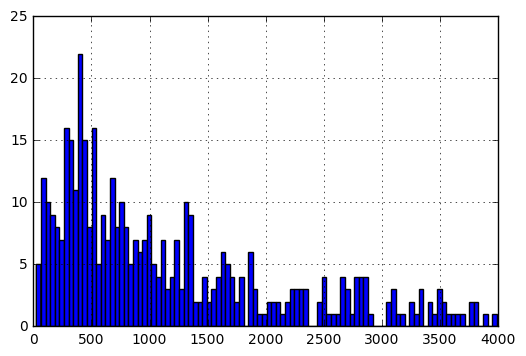

In [12]:
# более детальная картинка
basin_list["area"].hist(bins=100)

In [13]:
# Статистика
print("Средняя площадь:", basin_list["area"].mean())
print("Медианная площадь:", basin_list["area"].median())

Средняя площадь: 1162.7619534883725
Медианная площадь: 834.5


In [14]:
# Квантили
basin_list["area"][basin_list['area'].isnull() == False].quantile(0.6)

1106.3999999999999

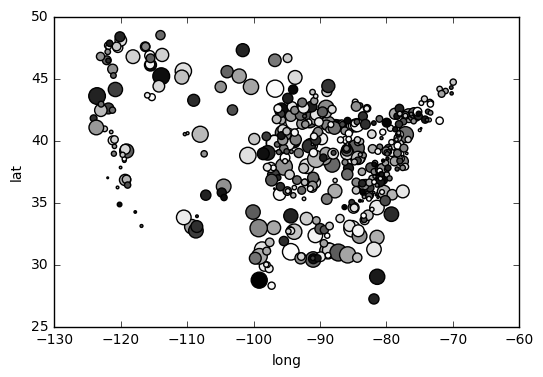

In [15]:
# Расположение бассейнов
basin_list[['long', 'lat']].plot.scatter('long', 'lat', 
                                         s=basin_list['area']/basin_list['area'].min(), 
                                         c=np.random.rand(len(basin_list['area'])))

Прим.: Поговорим о визуализации геоданных подробнее на следующей неделе

## Загрузим данные для одного из бассейнов

In [16]:
our_basin_id = basin_list["ID"][0]
our_basin_id

'02156500'

In [17]:
# Скачиваем данные
#!wget ftp://hydrology.nws.noaa.gov/pub/gcip/mopex/US_Data/Us_438_Daily/02156500.dly

In [18]:
# Открываем файл, считываем построчно

g = open('02156500.dly', 'r')

prec = []
pet = []
qobs = []
tmax = []
tmin = []
for line in g:
    s = line[12:].split()
    prec.append(float(s[0]))
    pet.append(float(s[1]))
    qobs.append(float(s[2]))
    tmax.append(float(s[3]))
    tmin.append(float(s[4]))

data = pd.DataFrame({'Prec': prec, 
                     'PET': pet, 
                     'Qobs': qobs, 
                     'Tmax': tmax, 
                     'Tmin': tmin})

In [19]:
# Проверим результат
data.head()

,PET,Prec,Qobs,Tmax,Tmin
0,0.880,0.92,1.1717,16.0778,8.9111
1,0.889,0.00,1.3624,13.3167,0.4111
2,0.892,0.00,1.3079,9.4056,-3.7500
3,0.897,0.22,0.7800,8.3722,-1.8056
4,0.902,0.00,1.2875,9.2278,-1.7167


In [20]:
# Индекс нас не устраивает
# Сделаем индекс сами - узнаем первую и последнюю даты из нашего файла средствами linux
!(head -n1 && tail -n1) < 02156500.dly

In [21]:
# Создадим объект временного ряда из дат функцией date_range
# и назначим его индексом
data.index = pd.date_range('1948-01-01', '2003-12-31', freq='D')

In [22]:
# Проверим сверху
data.head()

,PET,Prec,Qobs,Tmax,Tmin
1948-01-01,0.880,0.92,1.1717,16.0778,8.9111
1948-01-02,0.889,0.00,1.3624,13.3167,0.4111
1948-01-03,0.892,0.00,1.3079,9.4056,-3.7500
1948-01-04,0.897,0.22,0.7800,8.3722,-1.8056
1948-01-05,0.902,0.00,1.2875,9.2278,-1.7167


In [23]:
# Проверим снизу
data.tail()

,PET,Prec,Qobs,Tmax,Tmin
2003-12-27,0.875,0.01,-99.0,15.7778,-4.9889
2003-12-28,0.876,0.00,-99.0,16.9000,-3.5167
2003-12-29,0.877,0.62,-99.0,15.7833,-2.1556
2003-12-30,0.878,2.07,-99.0,13.2667,0.1833
2003-12-31,0.880,0.00,-99.0,14.7333,-3.7222


In [24]:
# Видим, что прорущенные значения расхода воды обозначаются как -99.00
# Нам это неудобно, так как в расчете статистики они будут учитываться
# Заменим их на NaN
data = data.replace(-99, np.nan)
data.tail()

,PET,Prec,Qobs,Tmax,Tmin
2003-12-27,0.875,0.01,NaN,15.7778,-4.9889
2003-12-28,0.876,0.00,NaN,16.9000,-3.5167
2003-12-29,0.877,0.62,NaN,15.7833,-2.1556
2003-12-30,0.878,2.07,NaN,13.2667,0.1833
2003-12-31,0.880,0.00,NaN,14.7333,-3.7222


## Основные структуры данных Pandas

+ Series - индексированный ряд
+ DataFrame - индексированная матрица (таблица)

In [25]:
# Series
type(data.PET)

pandas.core.series.Series

In [26]:
# DataFrame
type(data)

pandas.core.frame.DataFrame

## Основные рабочие функции

+ Рисование
+ Аггрегирование
+ Корреляции

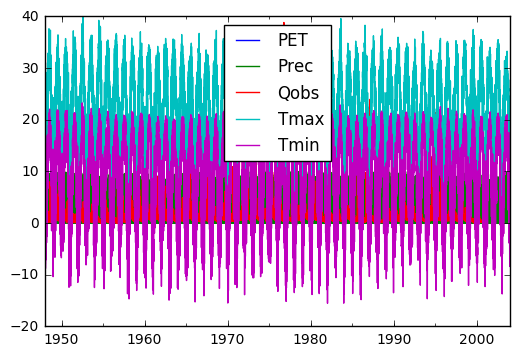

In [27]:
# Рисование
data.plot()

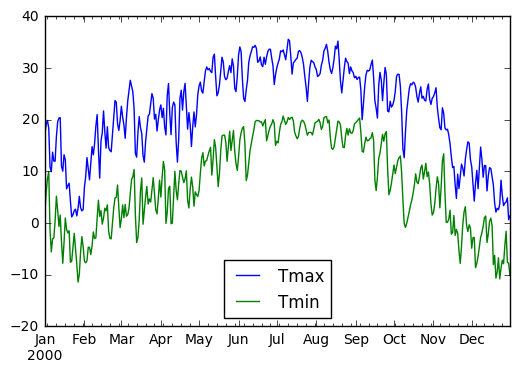

In [28]:
data['2000'][["Tmax", "Tmin"]].plot()

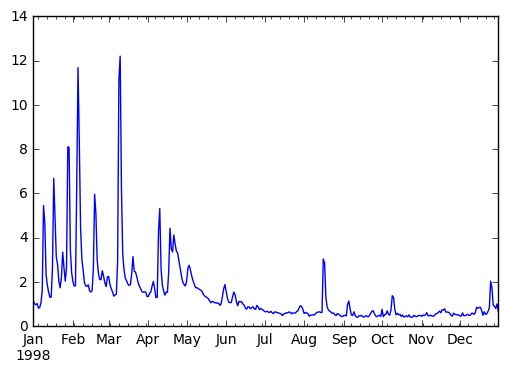

In [29]:
data.Qobs['1998'].plot()

In [30]:
# Аггрегирование
# среднегодовые величины
data_annual = data[['Qobs', 'Tmax', 'Tmin']].resample('A').mean()

In [31]:
# но суммы осадков и испарения
data_annual['Prec'] = data['Prec'].resample('A').sum()
data_annual['PET'] = data['PET'].resample('A').sum()

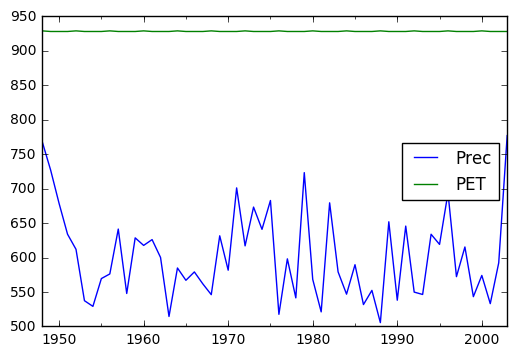

In [32]:
data_annual[['Prec', 'PET']].plot()

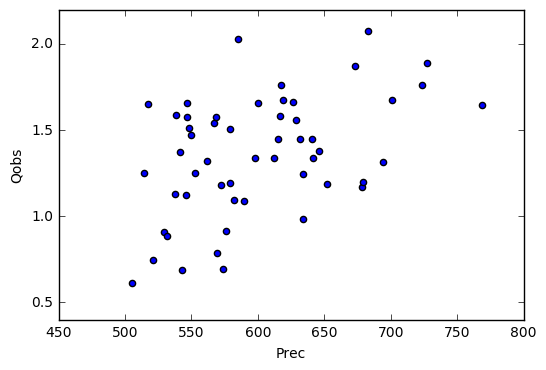

In [33]:
data_annual[['Qobs', 'Prec']].plot.scatter('Prec', 'Qobs')

In [34]:
# Корреляции
data_annual[['Qobs', 'Prec']].corr()

,Qobs,Prec
Qobs,1.000000,0.450777
Prec,0.450777,1.000000


In [35]:
data_annual[['Qobs', 'Prec']].corr(method='spearman')

,Qobs,Prec
Qobs,1.000000,0.405338
Prec,0.405338,1.000000


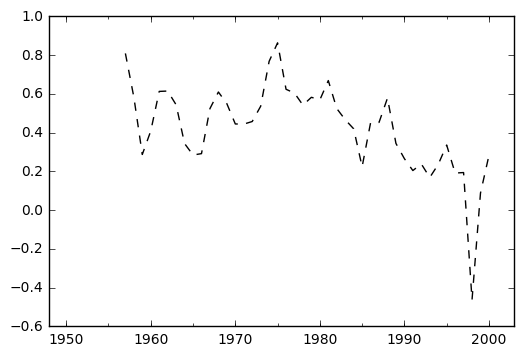

In [36]:
# Корреляция скользящих средних
data_annual.Qobs.rolling(window=10).corr(data_annual.Prec).plot(style='k--')

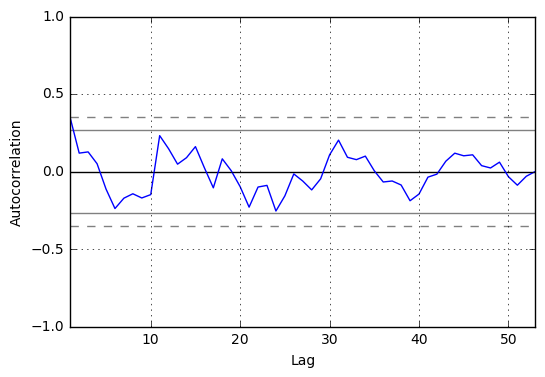

In [37]:
# Бонус
# Автокоррелограмма

from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(data_annual['Qobs'].dropna())

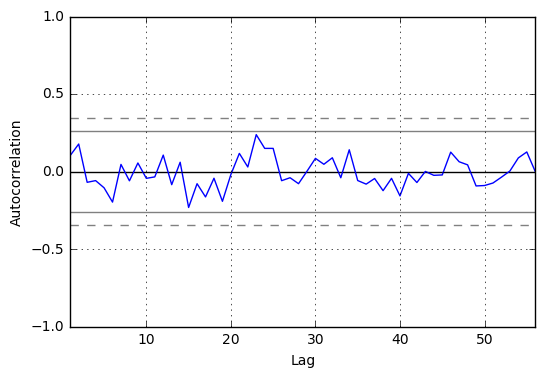

In [38]:
autocorrelation_plot(data_annual['Prec'].dropna())

In [39]:
# Группировка данных

# Аггрегируем данные по стоку в среднемесячном разрезе
data_mon = data['Qobs'].resample('M').mean().dropna()
data_mon = pd.DataFrame(data_mon)
# Явно добавляем столбец с номером месяца
data_mon['Month'] = data_mon.index.month
data_mon.head()

,Qobs,Month
1948-01-31,1.413626,1
1948-02-29,2.847459,2
1948-03-31,2.384568,3
1948-04-30,2.036253,4
1948-05-31,1.187281,5


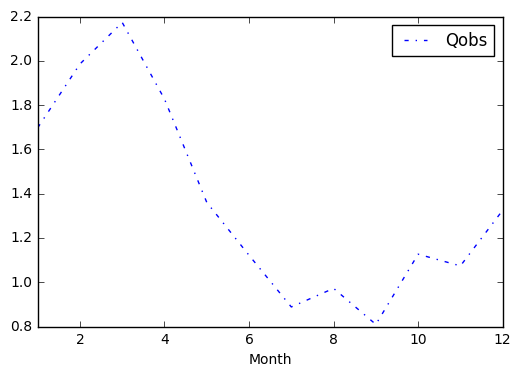

In [40]:
# Климатических среднемесячный гидрограф
grouped_data_mon = data_mon.groupby('Month').aggregate('mean')
grouped_data_mon.plot(style='b-.')

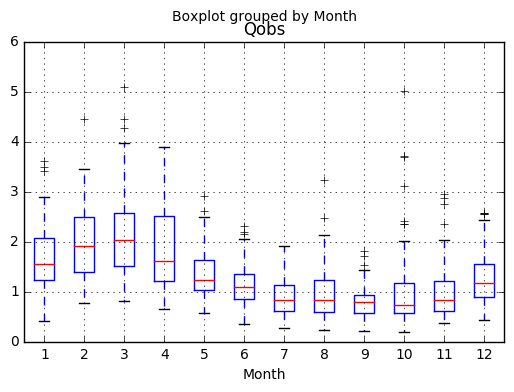

In [41]:
# Ящик с усами на каждый месяц
data_mon.boxplot(column=['Qobs'], by='Month')

In [49]:
# Pandas имеет неограниченные возможности по работе с данными
# Примеры работы в ссылках из презентации (Week3_practice.pdf)
# Море полезной информации и почвы для раздумий в документации pandas: 
# (http://pandas.pydata.org/pandas-docs/stable/)

# Список методов Series
print(dir(pd.Series)[188:])

['abs', 'add', 'add_prefix', 'add_suffix', 'align', 'all', 'any', 'append', 'apply', 'argmax', 'argmin', 'argsort', 'as_blocks', 'as_matrix', 'asfreq', 'asobject', 'asof', 'astype', 'at', 'at_time', 'autocorr', 'axes', 'base', 'between', 'between_time', 'bfill', 'blocks', 'bool', 'cat', 'clip', 'clip_lower', 'clip_upper', 'combine', 'combine_first', 'compound', 'compress', 'consolidate', 'convert_objects', 'copy', 'corr', 'count', 'cov', 'cummax', 'cummin', 'cumprod', 'cumsum', 'data', 'describe', 'diff', 'div', 'divide', 'dot', 'drop', 'drop_duplicates', 'dropna', 'dt', 'dtype', 'dtypes', 'duplicated', 'empty', 'eq', 'equals', 'ewm', 'expanding', 'factorize', 'ffill', 'fillna', 'filter', 'first', 'first_valid_index', 'flags', 'floordiv', 'from_array', 'from_csv', 'ftype', 'ftypes', 'ge', 'get', 'get_dtype_counts', 'get_ftype_counts', 'get_value', 'get_values', 'groupby', 'gt', 'hasnans', 'head', 'hist', 'iat', 'idxmax', 'idxmin', 'iget', 'iget_value', 'iloc', 'imag', 'index', 'interpo